<a href="https://colab.research.google.com/github/steven2Gamu/2021-Galaxio/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

#### <math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <mrow>
      <mi>y</mi>
      <mo>=</mo>
      <mi>&#x03B1;</mi>
      <mi>x</mi>
      <mo>+</mo>
      <mi>&#x03B2;</mi>
    </mrow>
  </semantics>
</math>

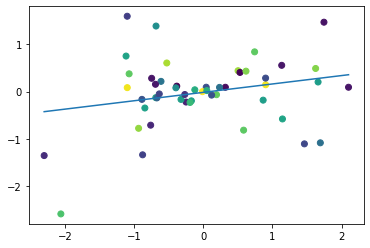

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Creates 50 random x and y numbers
np.random.seed(1)
n = 50;
x = np.random.randn(n)
y = x * np.random.randn(n)
     
# Makes the dots colorful
colors = np.random.rand(n)

# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=50)
plt.show()

#**Linear Regression Model with Pytorch**

In [4]:
x_values  =  [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

 Convert list of numbers to numpy array

In [5]:
x_train =  np.array(x_values, dtype=np.float32)
x_train.shape

#2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

Create a list of y values

In [6]:
y_values = [2*i + 1 for i in x_values]
y_values

y_train =  np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

### Building a model

In [7]:
import torch
import torch.nn as nn

#### Create Model

###### 1. Linear model
          True Equation: y = 2x + 1
###### 2. Forward 
          Example
            Input x = 1
            Output y = ?


In [8]:
#Create class
class LinearRegressionModel(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out



###### Instantiate Model Class

In [10]:
input_dim = 1
output_dim = 1

model =  LinearRegressionModel(input_dim, output_dim)

###### Instantiate Loss Class

In [11]:
criterion = nn.MSELoss()

###### Instantiate Optimizer Class
          parameters = parameters - learning_rate * parameters_gradients

In [12]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

##### **Train Model**

###### Process
        1. Convert inputs/labels to tensors with gradients
        2. Clear gradient buffets
        3. Get output given inputs
        4. Get loss
        5. Get gradients w.r.t. parameters
        6. Update parameters using gradients
            parameters = parameters - learning_rate * parameters_gradients

In [15]:
epochs = 200
for epoch in range(epochs):
    epoch += 1

    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))


epoch 1, loss 0.0031898170709609985
epoch 2, loss 0.003154188394546509
epoch 3, loss 0.003118958557024598
epoch 4, loss 0.0030841373372823
epoch 5, loss 0.0030496949329972267
epoch 6, loss 0.0030156238935887814
epoch 7, loss 0.002981980098411441
epoch 8, loss 0.002948661334812641
epoch 9, loss 0.0029157428070902824
epoch 10, loss 0.002883174456655979
epoch 11, loss 0.0028509818948805332
epoch 12, loss 0.002819118555635214
epoch 13, loss 0.0027876482345163822
epoch 14, loss 0.002756536938250065
epoch 15, loss 0.0027257513720542192
epoch 16, loss 0.0026953225024044514
epoch 17, loss 0.0026652063243091106
epoch 18, loss 0.002635437995195389
epoch 19, loss 0.0026060035452246666
epoch 20, loss 0.002576937200501561
epoch 21, loss 0.002548123011365533
epoch 22, loss 0.0025197092909365892
epoch 23, loss 0.002491536783054471
epoch 24, loss 0.0024637063033878803
epoch 25, loss 0.0024362150579690933
epoch 26, loss 0.0024090143851935863
epoch 27, loss 0.0023821303620934486
epoch 28, loss 0.0023555

##### Looking at predicted & training values

In [16]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

# y = 2x + 1 
y_train

array([[ 0.96562976],
       [ 2.9705794 ],
       [ 4.9755287 ],
       [ 6.9804783 ],
       [ 8.985428  ],
       [10.990377  ],
       [12.995327  ],
       [15.000277  ],
       [17.005226  ],
       [19.010176  ],
       [21.015125  ]], dtype=float32)

##### Plot of predicted and actual values

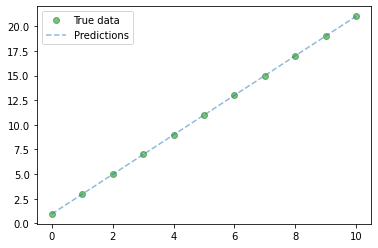

In [17]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

##### Save Model

In [18]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

###### Load Model

In [19]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))